Example) 주성분 분석

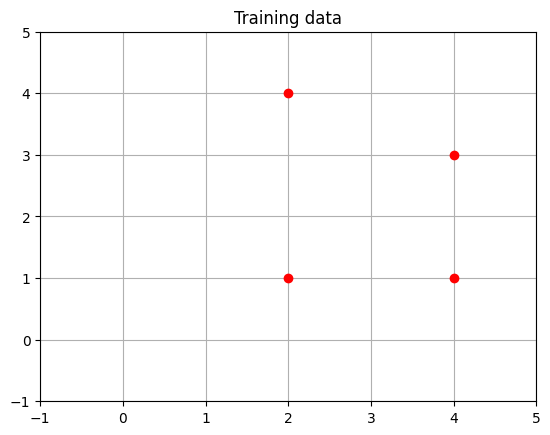

Mean: [3.   2.25]
Covariance: [[ 1.     -0.25  ]
 [-0.25    1.6875]]
Eigenvalue: [0.91870405 1.76879595]
Eigenvector: [[-0.95098267  0.30924417]
 [-0.30924417 -0.95098267]]


===== Unit vector about large eigenvalue =====
Unit vector: [[ 0.30924417 -0.95098267]]
Feature vector with PCA: [[-0.33249433 -3.18544234  0.28599402 -1.61597133]]
Variance of feature vector with PCA: 1.7687959533979825
Projected Feature vector: [[-0.10282193 -0.98507948  0.08844198 -0.49972972]
 [ 0.31619634  3.02930047 -0.27197535  1.53676073]]


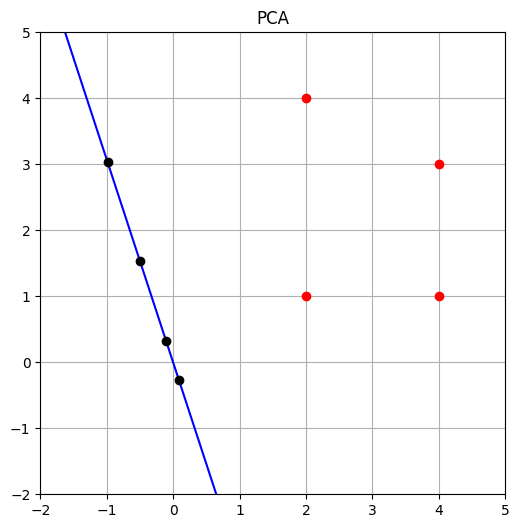



===== Unit vector about small eigenvalue =====
Unit vector: [[-0.95098267 -0.30924417]]
Feature vector with PCA: [[-2.21120952 -3.13894203 -4.11317486 -4.7316632 ]]
Variance of feature vector with PCA: 0.9187040466020178
Projected Feature vector: [[2.10282193 2.98507948 3.91155802 4.49972972]
 [0.68380366 0.97069953 1.27197535 1.46323927]]


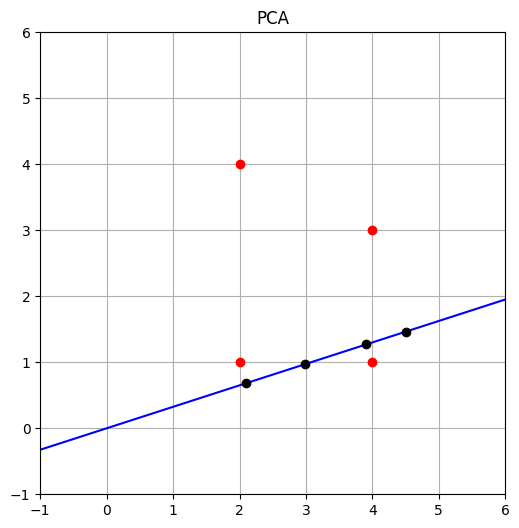

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[2, 1], [2, 4], [4, 1], [4, 3]])

plt.title("Training data")
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')
plt.axis([-1, 5, -1, 5])
plt.grid(True)
plt.show()

x_mean = x_train.mean(axis=0)
x_var = np.cov(x_train.T, ddof=0)

print('Mean:', x_mean)
print('Covariance:', x_var)

Elambda, Eu = np.linalg.eig(x_var)

print('Eigenvalue:', Elambda)
print('Eigenvector:', Eu)

print('\n')
print('===== Unit vector about large eigenvalue =====')

u_for_PCA = np.array([Eu[:,1]])

print('Unit vector:', u_for_PCA)

Feature_vec_PCA = u_for_PCA @ x_train.T

print('Feature vector with PCA:', Feature_vec_PCA)

Feature_vec_PCA_var = np.cov(Feature_vec_PCA, ddof=0)

print('Variance of feature vector with PCA:', Feature_vec_PCA_var)

P_matrix = u_for_PCA.T * u_for_PCA
Projected_Feature_vec = P_matrix @ x_train.T

print('Projected Feature vector:', Projected_Feature_vec)

plt.figure(figsize=(6,6))
plt.title("PCA")
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')

t = np.arange(-2, 2, 0.1)
plt.plot(t, u_for_PCA[0,1]/u_for_PCA[0,0] * t, 'b-')
plt.plot(Projected_Feature_vec[0,:], Projected_Feature_vec[1,:], 'ko')
plt.axis([-2, 5, -2, 5])
plt.grid(True)
plt.show()

## Example for 10th week
print('\n')
print('===== Unit vector about small eigenvalue =====')

u_for_PCA = np.array([Eu[:,0]])

print('Unit vector:', u_for_PCA)

Feature_vec_PCA = u_for_PCA @ x_train.T

print('Feature vector with PCA:', Feature_vec_PCA)

Feature_vec_PCA_var = np.cov(Feature_vec_PCA, ddof=0)

print('Variance of feature vector with PCA:', Feature_vec_PCA_var)

P_matrix = u_for_PCA.T * u_for_PCA
Projected_Feature_vec = P_matrix @ x_train.T

print('Projected Feature vector:', Projected_Feature_vec)

plt.figure(figsize=(6,6))
plt.title("PCA")
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')

t = np.arange(-1, 7, 0.1)
plt.plot(t, u_for_PCA[0,1]/u_for_PCA[0,0] * t, 'b-')
plt.plot(Projected_Feature_vec[0,:], Projected_Feature_vec[1,:], 'ko')
plt.axis([-1, 6, -1, 6])
plt.grid(True)
plt.show()

Example) Fisher의 선형 분별

w: [[0.24253563]
 [0.9701425 ]]


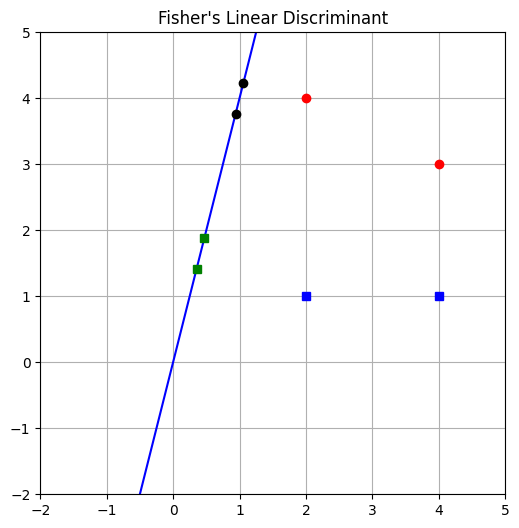

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[2,4], [4,3], [2,1], [4,1]])
y_train = np.array([1, 1, -1, -1])

omega_1 = x_train[y_train == 1, :]
omega_2 = x_train[y_train == -1, :]

m_1 = np.array([omega_1.mean(axis=0)])
m_2 = np.array([omega_2.mean(axis=0)])

S_1 = np.zeros((2,2))
for j in range(0, 2):
  S_1 += (omega_1[j,:] - m_1).T @ (omega_1[j,:] - m_1)

S_2 = np.zeros((2,2))
for j in range(0, 2):
  S_2 += (omega_2[j,:] - m_2).T @ (omega_2[j,:] - m_2)

S_W = S_1 + S_2

w = np.linalg.inv(S_W) @ (m_1-m_2).T

w = w / np.linalg.norm(w)

print('w:', w)

P_matrix = w.T * w
Projected_omega_1 = P_matrix @ omega_1.T
Projected_omega_2 = P_matrix @ omega_2.T

plt.figure(figsize=(6,6))
plt.title("Fisher's Linear Discriminant")
plt.plot(omega_1[:, 0], omega_1[:, 1], 'ro', omega_2[:, 0], omega_2[:, 1], 'bs')
t = np.arange(-2, 2, 0.1)
plt.plot(t, w[1]/w[0] * t, 'b-')
plt.plot(Projected_omega_1[0,:], Projected_omega_1[1,:], 'ko', Projected_omega_2[0,:], Projected_omega_2[1,:], 'gs')
plt.axis([-2, 5, -2, 5])
plt.grid(True)
plt.show()